In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [7]:
# Load customer data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Select relevant features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [10]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

In [11]:
'''
## Elbow method

The Elbow Method works by plotting the sum of squared errors (SSE) on the y-axis, and the number of clusters on the x-axis.
The SSE is the distance between each data point and its assigned cluster center.
As the number of clusters increases, the SSE typically decreases.
This is because as you split the data into more clusters, you capture more of the variance in the data.

## Silloutte

Measures cluster separation: The Silhouette score evaluates how well data points are separated between clusters in your data. It considers both how similar points are
within a cluster and how different they are from points in other clusters. Ranges from -1 to 1: A score closer to 1 indicates a good separation,
meaning points are well-clustered with high similarity within and high difference between clusters. Scores closer to -1 suggest poor separation,
where points might be assigned to the wrong cluster. Helps decide optimal clusters: The Silhouette score can be used to compare clustering results with different numbers of clusters. You can choose the number of clusters that leads to the highest Silhouette score, indicating the best separation between clusters.

'''

'\n## Elbow method\n\nThe Elbow Method works by plotting the sum of squared errors (SSE) on the y-axis, and the number of clusters on the x-axis.\nThe SSE is the distance between each data point and its assigned cluster center.\nAs the number of clusters increases, the SSE typically decreases.\nThis is because as you split the data into more clusters, you capture more of the variance in the data.\n\n## Silloutte\n\nMeasures cluster separation: The Silhouette score evaluates how well data points are separated between clusters in your data. It considers both how similar points are\nwithin a cluster and how different they are from points in other clusters. Ranges from -1 to 1: A score closer to 1 indicates a good separation, \nmeaning points are well-clustered with high similarity within and high difference between clusters. Scores closer to -1 suggest poor separation, \nwhere points might be assigned to the wrong cluster. Helps decide optimal clusters: The Silhouette score can be used to

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

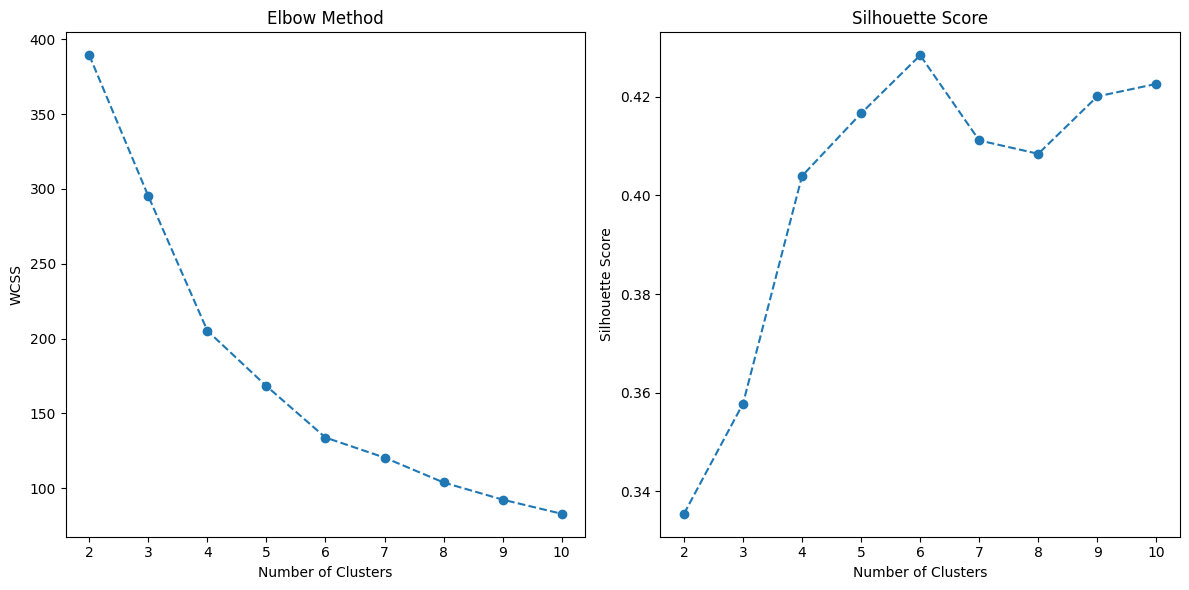

In [12]:
X = scaled_features
# Initialize lists to store silhouette scores and WCSS
silhouette_scores = []
wcss = []

# Calculate silhouette score and WCSS for different values of k
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [13]:
# Print the silhouette scores
for n_clusters, silhouette_score_value in zip(range(2, 11), silhouette_scores):
    print(f'Silhouette Score for {n_clusters} Clusters:', silhouette_score_value)

Silhouette Score for 2 Clusters: 0.33547192894004574
Silhouette Score for 3 Clusters: 0.357793388710272
Silhouette Score for 4 Clusters: 0.4039582785148566
Silhouette Score for 5 Clusters: 0.41664341513732767
Silhouette Score for 6 Clusters: 0.4284167762892593
Silhouette Score for 7 Clusters: 0.4111545340123845
Silhouette Score for 8 Clusters: 0.408443059554235
Silhouette Score for 9 Clusters: 0.4200735068174298
Silhouette Score for 10 Clusters: 0.42261564078864017


In [14]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6,n_init=10)
kmeans.fit(scaled_features)

KMeans(n_clusters=6, n_init=10)

In [15]:
# Add cluster labels to the dataset
data['cluster'] = kmeans.labels_

In [16]:
# Print silhouette score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print("Silhouette Score for K-means Clustering:", silhouette_avg)

Silhouette Score for K-means Clustering: 0.42742814991580175


In [20]:
# Create trace for each cluster
traces = []
for cluster_label in sorted(data['cluster'].unique()):
    cluster_data = data[data['cluster'] == cluster_label]
    trace = go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Annual Income (k$)'],
        z=cluster_data['Spending Score (1-100)'],
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.8,
            color=cluster_label,
            colorscale='Viridis'
        ),
        name=f'Cluster {cluster_label}'
    )
    traces.append(trace)

# Define layout
layout = go.Layout(
    title='Customer Segments (K-Means)',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Annual Income (k$)'),
        zaxis=dict(title='Spending Score (1-100)'),
    )
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show figure
fig.show()

In [18]:
###  in this context:

## X_train and X_test contain the scaled features.
## y_train and y_test contain the cluster labels obtained from K-means clustering.

In [19]:
# Define number of folds for cross-validation
k = 6
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(scaled_features):
    X_train, X_test = scaled_features[train_index], scaled_features[test_index]
    y_train, y_test = data['cluster'].iloc[train_index], data['cluster'].iloc[test_index]

    # Train logistic regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    # Predict using logistic regression
    y_pred = log_reg.predict(X_test)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Extract precision, recall, and F1-score
    precision = classification_rep['macro avg']['precision']
    recall = classification_rep['macro avg']['recall']
    f1 = classification_rep['macro avg']['f1-score']

    # Store evaluation metrics
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate average accuracy, precision, recall, and F1-score across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print("\nAccuracy:", avg_accuracy)
print("Precision:", avg_precision)
print("Recall:", avg_recall)
print("F1-score:", avg_f1)


Accuracy: 0.9750445632798574
Precision: 0.9770061728395062
Recall: 0.9643518518518519
F1-score: 0.9677694247998686
